# Macroeconomía I

## Método de Perturbación basado en la Aproximación de las Funciones de Política

## (El Modelo Neoclásico de Crecimiento)

Mauricio M. Tejada

ILADES - Universidad Alberto Hurtado

### El Problema de Opmización 

El problema de optimización del planificador central es el siguiente:

\begin{eqnarray*}
\max U_{0} & = & \sum_{t=0}^{\infty}\beta^{t}\left[\frac{c_{t}^{1-\sigma}-1}{1-\sigma}\right]\\
s.a &  & c_{t}+i_{t}=Ak_{t}^{\alpha}\\
 &  & k_{t+1}=i_{t}+(1-\delta)k_{t}\\
 &  & k_{0}\,dado.
\end{eqnarray*}

Alternativamente:

\begin{eqnarray*}
\max U_{0} & = & \sum_{t=0}^{\infty}\beta^{t}\left[\frac{c_{t}^{1-\sigma}-1}{1-\sigma}\right]\\
s.a &  & c_{t}+k_{t+1}=Ak_{t}^{\alpha}+(1-\delta)k_{t}\\
 &  & k_{0}\,dado.
\end{eqnarray*}

De las CPO tenemos el siguiente sistema de ecuaciones en diferencias (no lineal):


\begin{eqnarray*}
c_{t}^{-\sigma} & = & \beta c_{t+1}^{-\sigma}\left[\alpha Ak_{t+1}^{\alpha-1}+(1-\delta)\right]\\
c_{t}+k_{t+1} & = & Ak_{t}^{\alpha}+(1-\delta)k_{t}
\end{eqnarray*}

Este sistema se puede escribir como:

$$F(c_{t+1}, c_{t}, k_{t+1}, k_{t}) = 0$$

### Estado Estacionario 

El estado estacionario resuelve:
\begin{eqnarray*}
1 & = & \beta\left[\alpha Ak^{*\alpha-1}+(1-\delta)\right]\\
c^{*} & = & Ak^{*\alpha}-\delta k^{*}
\end{eqnarray*}

La solución puede ser hallada algebraicamente:

\begin{eqnarray*}
k^{*} & = & \left[\frac{1-\beta(1-\delta)}{\beta\alpha A}\right]^{\frac{1}{\alpha-1}}\\
c^{*} & = & A\left[\frac{1-\beta(1-\delta)}{\beta\alpha A}\right]^{\frac{\alpha}{\alpha-1}}-\delta\left[\frac{1-\beta(1-\delta)}{\beta\alpha A}\right]^{\frac{1}{\alpha-1}}
\end{eqnarray*}

In [1]:
# Cargamos módulos necesarios

# 1. Graficos
%matplotlib inline 
import matplotlib.pyplot as plt

# 2. Uso de arrays 
import numpy as np

# 3. Optimizadores y herramientas del álgebra lineal
import scipy.optimize as opt
import scipy.linalg as lalg

# 4. Metemática simbólica
import sympy as sp
sp.init_printing()

In [2]:
# Parametrización

α = 0.3
β = 0.9
σ = 0.5
A = 2
δ = 0.25

params = (α, β, σ, A, δ)

In [3]:
# Definimos el número de variables de estado y de control

n = 1  # Variables de estado
m = 1  # Variables de control

Calculamos el estado estacionario usando un solver de julia.

In [4]:
# Definimos primero es sistema de ecuaciones a resolver.

def systemss(x,pr):
    # Nota: los parámetros dentro la función son considerados variables locales 
    α, β, σ, A, δ = pr
    
    ks = x[0]
    cs = x[1]
    
    fout = [0.0, 0.0]

    fout[0] = ks - ((1-β*(1-δ))/(α*β*A))**(1/(α-1))
    fout[1] = cs - A*(ks ** α) + δ*ks
    
    return fout

Resolvemos el sistema de ecuaciones no lineales utilizando el comando `root` del módulo `scipy`.

In [5]:
res_ss = opt.root(lambda x: systemss(x,params), [0.5, 0.5])
     
xss = res_ss.x

ks  = xss[0]
cs  = xss[1]
ys  = A*(ks ** α)
invs = ks - (1-δ)*ks

print("ks = ",ks)
print("cs = ",cs)
print("ys = ",ys)
print("invs = ", invs)

ks =  2.065450805481485
cs =  1.9698280830054897
ys =  2.486190784375861
invs =  0.5163627013703711


### Aproximación Lineal de las Funciones de Política

Recordemos que el sistema de ecuaciones que caracteriza el óptimo era:

$$F(c_{t+1}, c_{t}, k_{t+1}, k_{t}) = 0$$

La solución de este sistema, son dos funciones (denominadas funciones de política) que permiten recuperar la secuencia de consumo y capital:

\begin{eqnarray*}
c_t & = & g(k_t)\\
k_{t+1} & = & h(k_t)
\end{eqnarray*}

Ahora podemos aproximar linealmente, alrededor del estado estacionario, las funciones de política:

\begin{eqnarray*}
c_{t} &=& g(k^*) + g_k(k^*)(k_t - k^*)  \\
k_{t+1} &=& h(k^*) + h_k(k^*)(k_t - k^*)  
\end{eqnarray*}

El problema radica entonces en hallar las derivadas $g_k(k^*)$ y $h_k(k^*)$.

**El método general:**

El sistema de CPOs es:

$$F(y_{t+1},y_{t},x_{t+1},x_{t}) = 0$$

donde $y$ es el vector de variables de control (de tamaño $m \times 1$) y $x$ es el vector de variables de estado (de tamaño $n \times 1$). 

La aproximación de primer orden de las funciones de política es:

\begin{eqnarray*}
g(x) &=& g(x^*) + g_x(x^*)(x-x^*) \\
h(x) &=& h(x^*) + h_x(x^*)(x-x^*)
\end{eqnarray*}

Por definición de función de política, en estado estacionario tenemos que:
\begin{eqnarray*}
g(x^*) &=& y^* \\
h(x^*) &=& x^* 
\end{eqnarray*}

Usando el sistema descrito en $F(\cdot)$ y las funciones de política:

$$F(g(h(x_{t})),g(x_{t}),h(x_{t}),x_{t}) = F(x_t) = 0$$

Derivando el sistema de ecuaciones de las CPOs respecto de $x$ y evaluando en el estado estacionario tenemos:

$$F_x(x^*) = f_{y'} g_x h_x + f_y g_x + f_{x'}h_x + f_x = 0$$

En notación matricial:

\begin{align*}
\left[\begin{array}{cc}
f_{x'} & f_{y'}\end{array}\right]\left[\begin{array}{c}
I\\
g_{x}
\end{array}\right]h_{x} & =-\left[\begin{array}{cc}
f_{x} & f_{y}\end{array}\right]\left[\begin{array}{c}
I\\
g_{x}
\end{array}\right]\\
A\left[\begin{array}{c}
I\\
g_{x}
\end{array}\right]h_{x} & =B\left[\begin{array}{c}
I\\
g_{x}
\end{array}\right]
\end{align*}

Por otro lado, sea $P$ la matrix de autovectores de la matriz $h_x$ de tal manera que:

$$h_x P = P \Lambda$$

Si definimos que $Z=\left[\begin{array}{c}
I\\
g_{x}
\end{array}\right]P$ entonces la ecuación anterior se puede escribir como:

$$A Z \Lambda  = B Z$$

Este problema se puede expresar como un problema de autovalores generalizado. Para matrices $A$ y $B$ dadas, existe una matriz V y una matriz diagonal $D$ tal que:

$$A\left[\begin{array}{cc}
V_{1} & V_{2}\end{array}\right]\left[\begin{array}{cc}
D_{11} & 0\\
0 & D_{22}
\end{array}\right]=B\left[\begin{array}{cc}
V_{1} & V_{2}\end{array}\right]$$

Si todos los autovalores en $D_{11}$ están dentro el circulo unitario, tenemos que:

\begin{align*}
\Lambda & =D_{11}\\
\left[\begin{array}{c}
I\\
g_{x}
\end{array}\right]P & =V_{1}=\left[\begin{array}{c}
V_{11}\\
V_{12}
\end{array}\right]
\end{align*}

con lo cual:

\begin{align*}
h_{x} & =V_{11}D_{11}V_{11}^{-1}\\
g_{x} & =V_{12}V_{11}^{-1}
\end{align*}

### Implementación

Definimos primero el sistema de ecuaciones en diferencias caracterizado por las CPOs del problema. Usamos la capacidad de realizar oporaciones simbólicas con el módulo `sympy`.

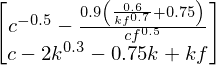

In [7]:
kf, cf, k, c = sp.symbols('kf, cf, k, c', real=True)

cpo1 = c**-σ - β*(cf**-σ)*(α*A*(kf**(α-1))+(1-δ))
cpo2 = c + kf - A*(k**α) - (1-δ)*k

F = sp.Matrix([cpo1,cpo2])

F

Verificamos si el sistema asociado a las CPOs esta bien escrito. En estado estacionario debiera cumplirse exáctamente con cero.

In [8]:
F.subs([(kf,ks), (cf,cs), (k,ks), (c,cs)])

Calculamos la matriz jacobiana del sistema (esto es $f_{k'}$, $f_{k}$, $f_{c'}$ y $f_{c}$) evaluadas en el estado estacionario:

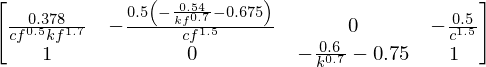

In [9]:
Fx = F.jacobian([kf,cf,k,c])
Fx_ss = Fx.subs([(kf,ks), (cf,cs), (k,ks), (c,cs)])

Fx

Trasformamos el objeto ahora a un `array` para hacer operaciones.

In [10]:
Fx_ss_num = np.array(Fx_ss.tolist()).astype(np.float64)
print(Fx_ss_num)

[[ 0.07847881  0.18085375  0.         -0.18085375]
 [ 1.          0.         -1.11111111  1.        ]]


A partir de este punto el procedimiento es estándar. Por tanto, el código puede ser reutilizado.

In [11]:
(Neq, Nvar) = np.shape(Fx_ss_num)

A = Fx_ss_num[:,0:n+m]     
B = -Fx_ss_num[:,n+m:Nvar] 

D, V = lalg.eig(B,A)

DD = np.diag(D.real)
D11 = DD[0:n,0:n]
D22 = DD[n:n+m, n:n+m]

V1 = V[:,0:n]
V11 = V1[0:n,:]
V12 = V1[n:n+m,:]

Las funciones de política se calculan como sigue:

In [12]:
hx = V11*D11*lalg.inv(V11)
gx = V12*lalg.inv(V11)

print("Solucion:")
print("c(t) = gx * k(t), con gx = ", gx[0][0])
print("k(t+1) = hx * k(t), con hx = ", hx[0][0])

Solucion:
c(t) = gx * k(t), con gx =  0.5514722813918114
k(t+1) = hx * k(t), con hx =  0.5596388297192997


### Simulando Transiciones al Estado Estacionario

In [13]:
k0 = 0.2*ks
print("Stock de Capital Inicial es", k0)

Stock de Capital Inicial es 0.413090161096297


In [14]:
T = 15
cc = np.zeros(T)
kk = np.zeros(T+1)
yy = np.zeros(T)
ii = np.zeros(T)

kk[0] = k0

for t in range(T):
    cc[t] = cs + gx[0][0]*(kk[t]-ks)
    kk[t+1] = ks + hx[0][0]*(kk[t]-ks)
    yy[t] = ys + α*(ks**(α-1))*(kk[t]-ks)
    ii[t] = kk[t+1]-(1-δ)*kk[t]

time = np.arange(0,T+1,1)

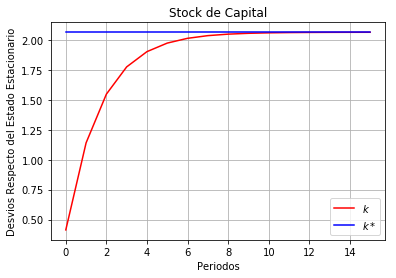

In [41]:
plt.plot(time, kk, 'r', label='$k$')
plt.plot(time, ks*np.ones(T+1), 'b', label='$k*$')
plt.title('Stock de Capital')
plt.xlabel('Periodos')
plt.ylabel('Desvios Respecto del Estado Estacionario')
plt.legend()
plt.grid(True)
plt.show()

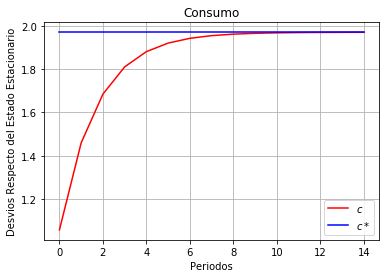

In [40]:
plt.plot(time[0:T], cc, 'r', label='$c$')
plt.plot(time[0:T], cs*np.ones(T), 'b', label='$c*$')
plt.title('Consumo')
plt.xlabel('Periodos')
plt.ylabel('Desvios Respecto del Estado Estacionario')
plt.legend()
plt.grid(True)
plt.show()

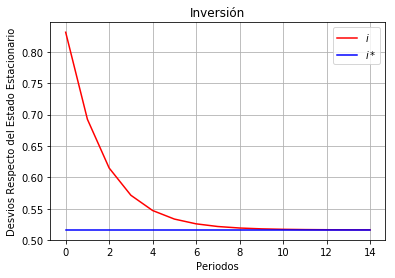

In [39]:
plt.plot(time[0:T], ii, 'r', label='$i$')
plt.plot(time[0:T], invs*np.ones(T), 'b', label='$i*$')
plt.title('Inversión')
plt.xlabel('Periodos')
plt.ylabel('Desvios Respecto del Estado Estacionario')
plt.legend()
plt.grid(True)
plt.show()

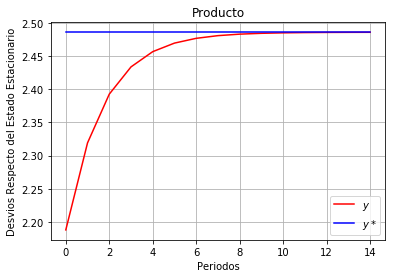

In [38]:
plt.plot(time[0:T], yy, 'r', label='$y$')
plt.plot(time[0:T], ys*np.ones(T), 'b', label='$y*$')
plt.title('Producto')
plt.xlabel('Periodos')
plt.ylabel('Desvios Respecto del Estado Estacionario')
plt.legend()
plt.grid(True)
plt.show()

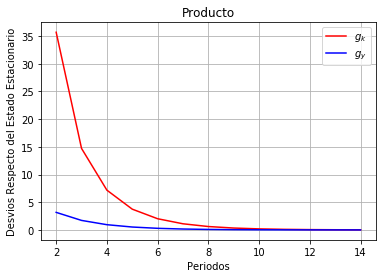

In [37]:
gk = (np.divide(kk[2:T],kk[1:T-1]) - 1)*100 # Desde k1
gy = (np.divide(yy[2:T],yy[1:T-1]) - 1)*100

plt.plot(time[2:T], gk, 'r', label='$g_k$')
plt.plot(time[2:T], gy, 'b', label='$g_y$')
plt.title('Producto')
plt.xlabel('Periodos')
plt.ylabel('Desvios Respecto del Estado Estacionario')
plt.legend()
plt.grid(True)
plt.show()

Ahora escribimos una función que calcule automáticamente $h_x$ y $g_x$ a partir de $F_x(x^*)$. Esta función puede ser reusada para resolver otros problemas.

In [45]:
def solvefirstorderaprox(Fx,num_states,num_controls):

    (Neq, Nvar) = np.shape(Fx)

    A = Fx[:,0:num_states+num_controls]     
    B = -Fx[:,num_states+num_controls:Nvar] 

    D, V = lalg.eig(B,A)

    DD = np.diag(D.real)
    D11 = DD[0:num_states,0:num_states]
    D22 = DD[num_states:num_states+num_controls, num_states:num_states+num_controls]

    V1 = V[:,0:num_states]
    V11 = V1[0:num_states,:]
    V12 = V1[num_states:num_states+num_controls,:]

    hx = V11*D11*lalg.inv(V11)
    gx = V12*lalg.inv(V11)
    
    return hx, gx

In [49]:
# Testeamos la función
hxsol, gxsol = solvefirstorderaprox(Fx_ss_num,n,m)

print('hxsol =', hxsol[0][0])
print('gxsol =', gxsol[0][0])

hxsol = 0.5596388297192997
gxsol = 0.5514722813918114
